# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import wikipedia
import string

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("punkt")


plt.style.use("dark_background")

pd.set_option("display.max_columns", 500)
plt.style.use("dark_background")

%load_ext lab_black

[nltk_data] Downloading package stopwords to /home/luke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/luke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Sentiment analysis of all presidential candidate wikipedia pages (Words)

Scrape Wiki page, clean, and do sentiment analysis using NLTK library

In [20]:
def sentiment_of_wiki_page_words(title):
    # grab text from wiki page
    wiki = wikipedia.page(title, auto_suggest=False)
    text = wiki.content

    # split into words
    word_tokens = word_tokenize(text)

    # Remove stop words and punctuation

    stops = stopwords.words("english")
    for n in string.punctuation:
        stops.append(n)

    additional_stops = [
        "==",
        "''",
        "'s",
        "``",
        "``",
        "———",
        "ISBN",
        "===",
        "Party",
        "party",
        "United",
        "united",
    ]
    for stop in additional_stops:
        stops.append(stop)

    filtered_text = [w for w in word_tokens if not w.lower() in stops]

    # Dataframe to store results
    sendf = pd.DataFrame(filtered_text, columns=["text"])

    # Sentiment analysis object
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to each word
    sendf[["neg", "neu", "pos", "compund"]] = (
        sendf["text"].apply(sid.polarity_scores).apply(pd.Series)
    )
    # Remove neutral words
    sendf = sendf[sendf.compund != 0.0].drop_duplicates()

    # Calculate sum, mean, and median scores
    sum_score = sendf["compund"].sum()
    mean_score = sendf["compund"].mean()
    median_score = sendf["compund"].median()

    # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
    return sum_score, mean_score, median_score
    # return sendf

In [21]:
list_of_candidates = [
    "Joe Biden",
    "Robert F. Kennedy Jr.",
    "Marianne Williamson",
    "Doug Burgum",
    "Chris Christie",
    "Ron DeSantis",
    "Larry Elder",
    "Nikki Haley",
    "Asa Hutchinson",
    "Mike Pence",
    "Vivek Ramaswamy",
    "Tim Scott",
    "Corey Stapleton",
    "Francis X. Suarez",
    "Donald Trump",
]

In [22]:
df_pagesen = pd.DataFrame(
    columns=["Candidate", "sum_score", "mean_score", "median_score"]
)
for candidate in list_of_candidates:
    raw_results = sentiment_of_wiki_page_words(candidate)

    sum_score = raw_results[0]
    mean_score = raw_results[1]
    median_score = raw_results[2]

    new_row = {
        "Candidate": candidate,
        "sum_score": sum_score,
        "mean_score": mean_score,
        "median_score": median_score,
    }
    new_row = pd.DataFrame.from_dict(new_row, orient="index").T

    df_pagesen = pd.concat([df_pagesen, new_row])

df_pagesen["mean_score"] = df_pagesen["mean_score"].astype(float).round(4)
df_pagesen["party"] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

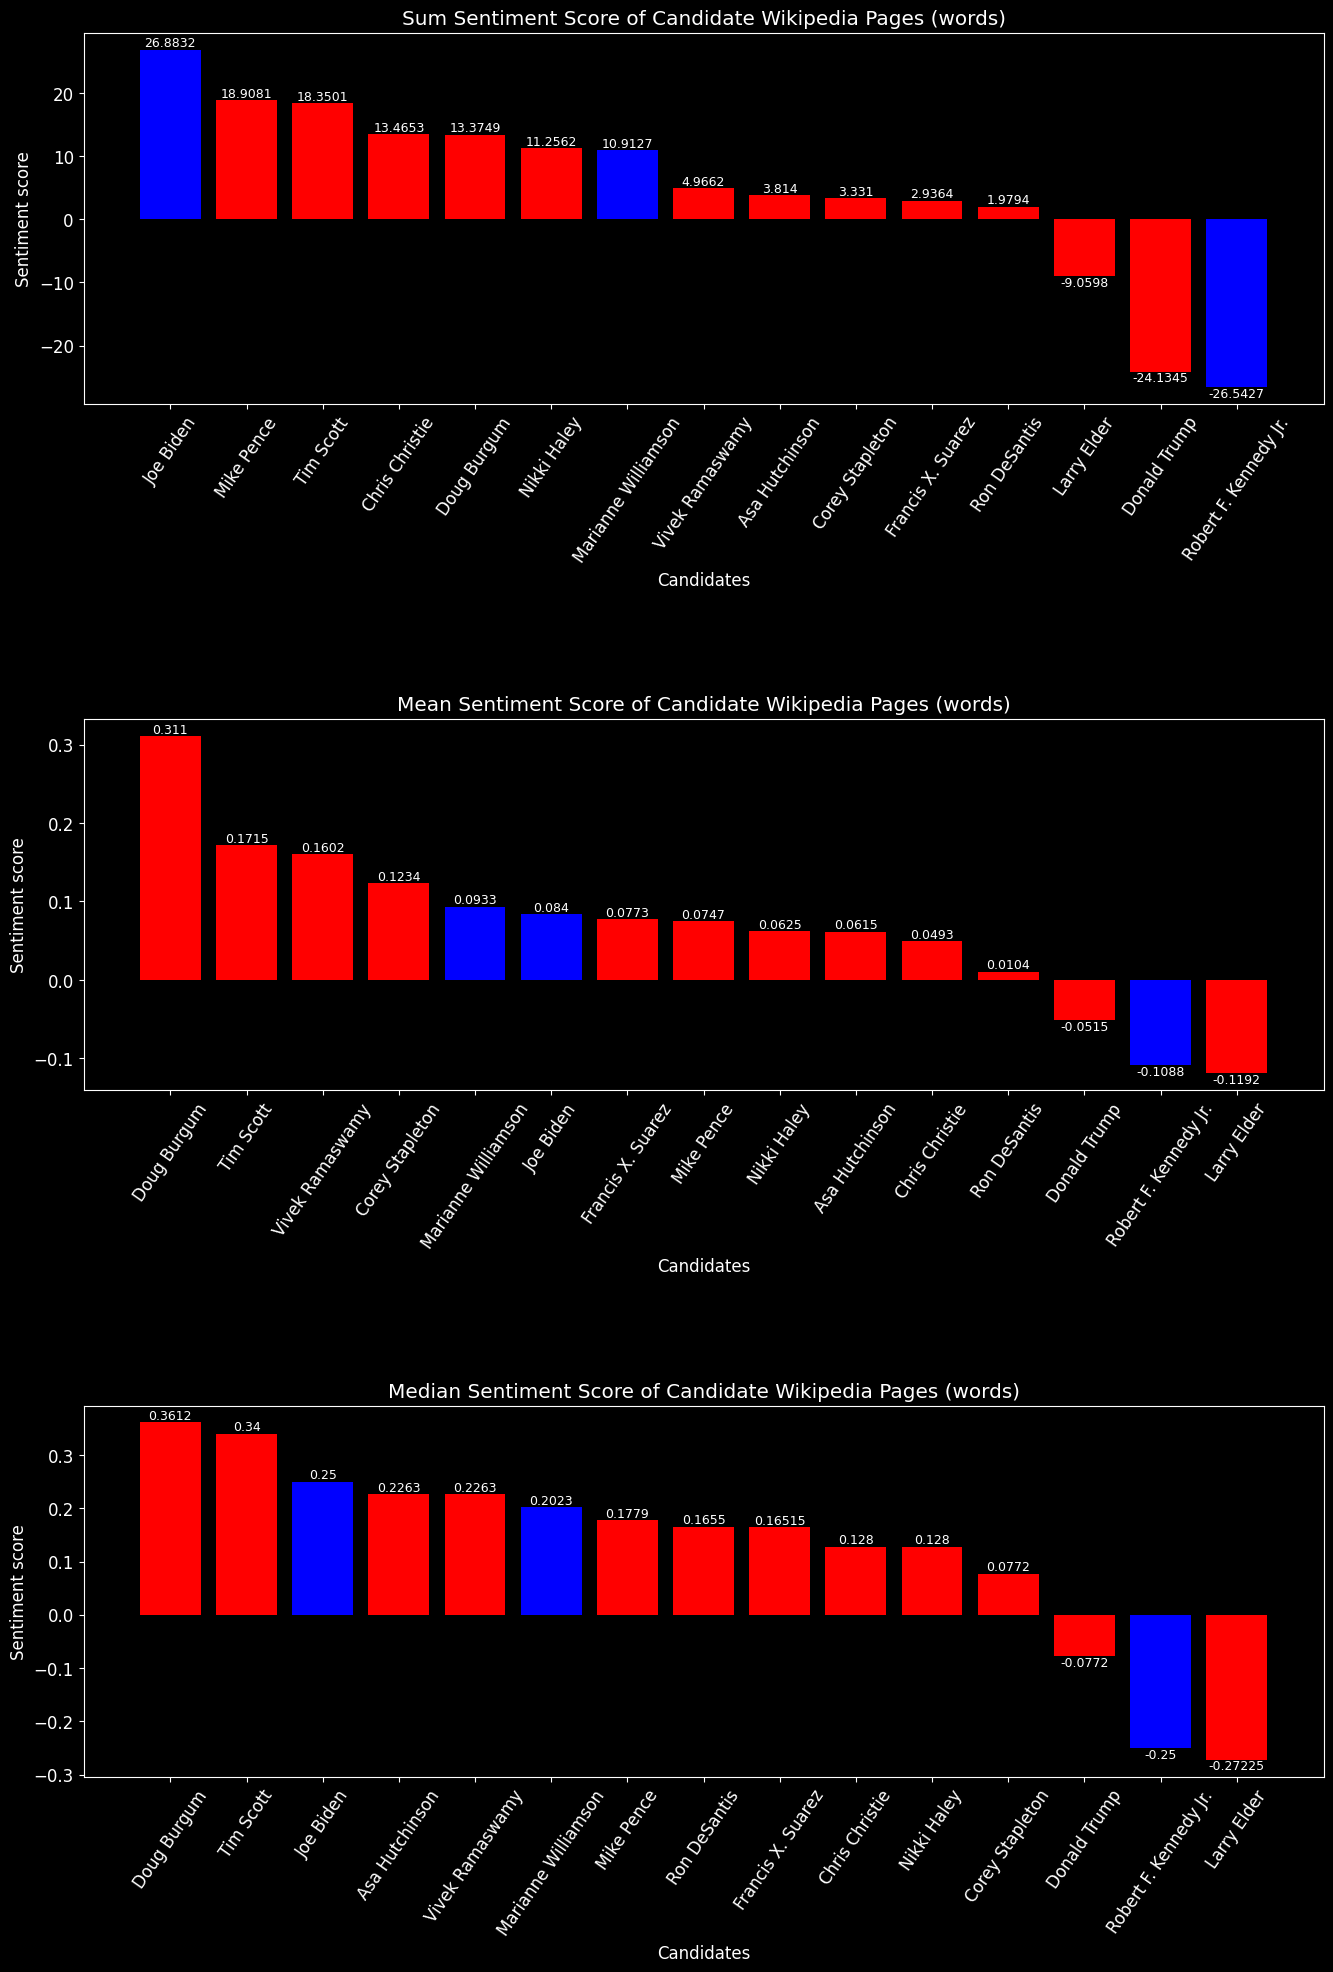

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))
plt.rc("font", size=12)  # controls default text sizes
plt.rc("axes", labelsize=16)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

plt.subplots_adjust(top=1.2)  # Increase top margin

# Sum score
sum_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="sum_score", ascending=False)["party"]
]

p1 = ax1.bar(
    x=df_pagesen.sort_values(by="sum_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="sum_score", ascending=False)["sum_score"],
    data=df_pagesen,
    color=sum_colors,
)

ax1.set_ylabel("Sentiment score")
ax1.set_xlabel("Candidates")
ax1.set_title("Sum Sentiment Score of Candidate Wikipedia Pages (words)")
ax1.bar_label(p1, label_type="edge", fontsize=9)

ax1.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the first subplot

# Mean score
mean_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="mean_score", ascending=False)["party"]
]

p2 = ax2.bar(
    x=df_pagesen.sort_values(by="mean_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="mean_score", ascending=False)["mean_score"],
    data=df_pagesen,
    color=mean_colors,
)

ax2.set_ylabel("Sentiment score")
ax2.set_xlabel("Candidates")
ax2.set_title("Mean Sentiment Score of Candidate Wikipedia Pages (words)")
ax2.bar_label(p2, label_type="edge", fontsize=9)

ax2.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the second subplot

# Median score
median_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="median_score", ascending=False)["party"]
]

p3 = ax3.bar(
    x=df_pagesen.sort_values(by="median_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="median_score", ascending=False)["median_score"],
    data=df_pagesen,
    color=median_colors,
)

ax3.set_ylabel("Sentiment score")
ax3.set_xlabel("Candidates")
ax3.set_title("Median Sentiment Score of Candidate Wikipedia Pages (words)")
ax3.bar_label(p3, label_type="edge", fontsize=9)

ax3.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the third subplot

plt.subplots_adjust(hspace=0.85)  # Adjust the vertical spacing between subplots

plt.show()

# Sentiment analysis of all presidential candidate wikipedia pages (Sentences)

In [24]:
def sentiment_of_wiki_page_sentences(title):
    # grab text from wiki page
    wiki = wikipedia.page(title, auto_suggest=False)
    text = wiki.content

    # split into sentences
    word_tokens = sent_tokenize(text)

    # Remove stop words and punctuation

    stops = stopwords.words("english")
    for n in string.punctuation:
        stops.append(n)

    additional_stops = [
        "==",
        "''",
        "'s",
        "``",
        "``",
        "———",
        "ISBN",
        "===",
        "Party",
        "party",
        "United",
        "united",
    ]
    for stop in additional_stops:
        stops.append(stop)

    filtered_text = [w for w in word_tokens if not w.lower() in stops]

    # Dataframe to store results
    sendf = pd.DataFrame(filtered_text, columns=["text"])

    # Sentiment analysis object
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to each word
    sendf[["neg", "neu", "pos", "compund"]] = (
        sendf["text"].apply(sid.polarity_scores).apply(pd.Series)
    )
    # Remove neutral words
    sendf = sendf[sendf.compund != 0.0].drop_duplicates()

    # Calculate sum, mean, and median scores
    sum_score = sendf["compund"].sum()
    mean_score = sendf["compund"].mean()
    median_score = sendf["compund"].median()

    # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
    return sum_score, mean_score, median_score
    # return sendf

In [25]:
df_pagesen = pd.DataFrame(
    columns=["Candidate", "sum_score", "mean_score", "median_score"]
)
for candidate in list_of_candidates:
    raw_results = sentiment_of_wiki_page_sentences(candidate)

    sum_score = raw_results[0]
    mean_score = raw_results[1]
    median_score = raw_results[2]

    new_row = {
        "Candidate": candidate,
        "sum_score": sum_score,
        "mean_score": mean_score,
        "median_score": median_score,
    }
    new_row = pd.DataFrame.from_dict(new_row, orient="index").T

    df_pagesen = pd.concat([df_pagesen, new_row])

df_pagesen["mean_score"] = df_pagesen["mean_score"].astype(float).round(4)
df_pagesen["party"] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

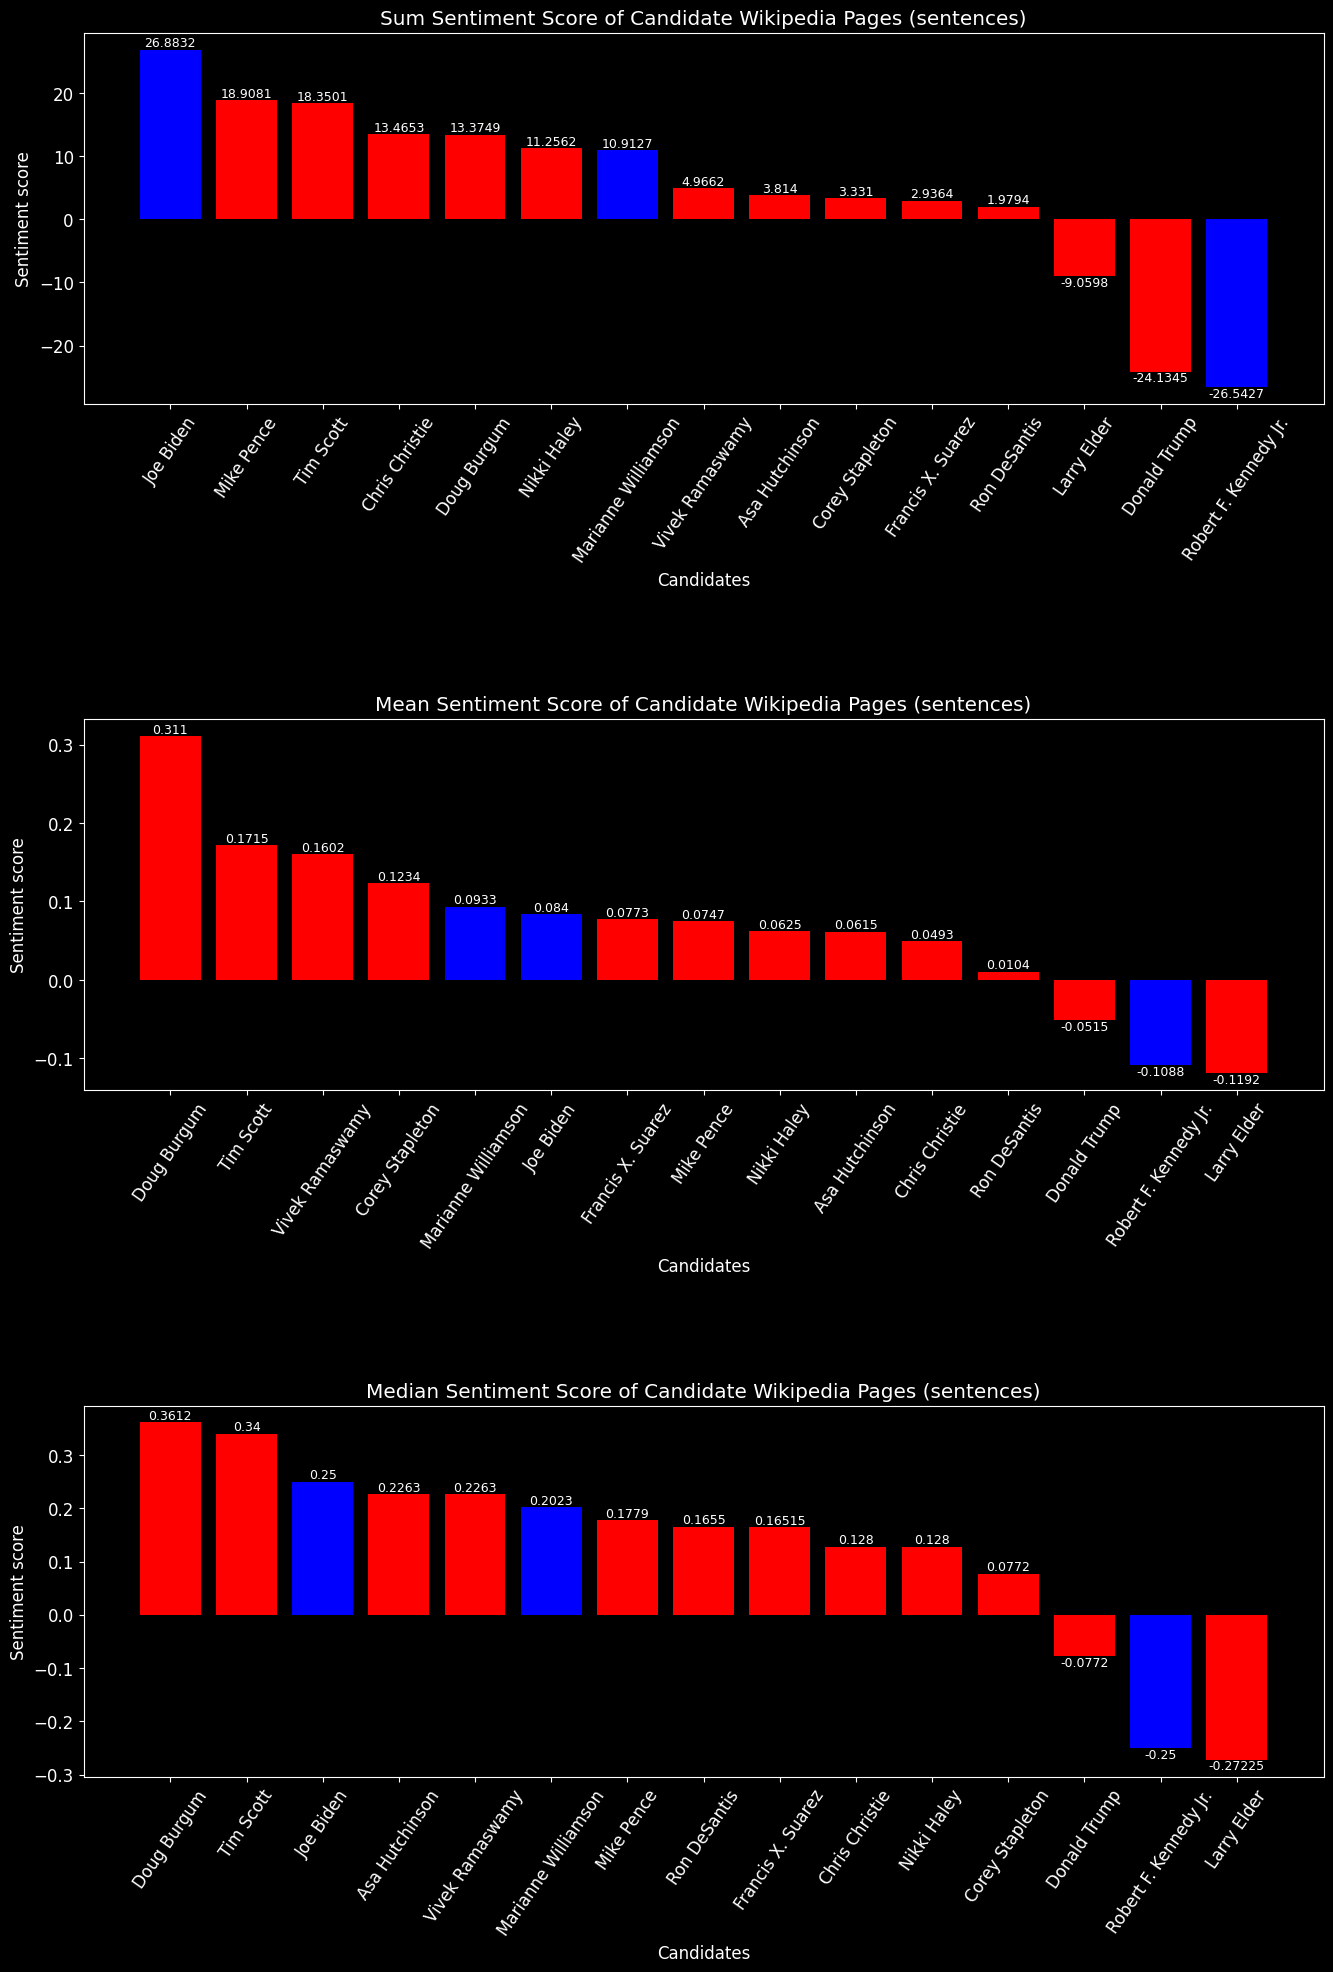

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))
plt.rc("font", size=12)  # controls default text sizes
plt.rc("axes", labelsize=16)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

plt.subplots_adjust(top=1.2)  # Increase top margin


# Sum score
sum_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="sum_score", ascending=False)["party"]
]

p1 = ax1.bar(
    x=df_pagesen.sort_values(by="sum_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="sum_score", ascending=False)["sum_score"],
    data=df_pagesen,
    color=sum_colors,
)

ax1.set_ylabel("Sentiment score")
ax1.set_xlabel("Candidates")
ax1.set_title("Sum Sentiment Score of Candidate Wikipedia Pages (sentences)")
ax1.bar_label(p1, label_type="edge", fontsize=9)

ax1.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the first subplot

# Mean score
mean_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="mean_score", ascending=False)["party"]
]

p2 = ax2.bar(
    x=df_pagesen.sort_values(by="mean_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="mean_score", ascending=False)["mean_score"],
    data=df_pagesen,
    color=mean_colors,
)

ax2.set_ylabel("Sentiment score")
ax2.set_xlabel("Candidates")
ax2.set_title("Mean Sentiment Score of Candidate Wikipedia Pages (sentences)")
ax2.bar_label(p2, label_type="edge", fontsize=9)

ax2.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the second subplot

# Median score
median_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="median_score", ascending=False)["party"]
]

p3 = ax3.bar(
    x=df_pagesen.sort_values(by="median_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="median_score", ascending=False)["median_score"],
    data=df_pagesen,
    color=median_colors,
)

ax3.set_ylabel("Sentiment score")
ax3.set_xlabel("Candidates")
ax3.set_title("Median Sentiment Score of Candidate Wikipedia Pages (sentences)")
ax3.bar_label(p3, label_type="edge", fontsize=9)

ax3.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the third subplot

plt.subplots_adjust(hspace=0.85)  # Adjust the vertical spacing between subplots

plt.show()

## text

In [15]:
biden_address = """"
Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America's day. This is democracy's day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.

Today we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The people—the will of the people has been heard, and the will of the people has been heeded. We've learned again that democracy is precious, democracy is fragile. And at this hour, my friends, democracy has prevailed.

So now, on this hallowed ground where just a few days ago violence sought to shake the Capitol's very foundation, we come together as one Nation under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries. As we look ahead in our uniquely American way—restless, bold, optimistic—and set our sights on the Nation we know we can be and we must be, I thank my predecessors of both parties for their presence here today. I thank them from the bottom of my heart. And I know the resilience of our Constitution and the strength, the strength of our Nation, as does President Carter, who I spoke with last night, who cannot be with us today, but whom we salute for his lifetime of service.

I have just taken the sacred oath each of these patriots have taken, the oath first sworn by George Washington. But the American story depends not on any one of us, not on some of us, but on all of us, on "We the People," who seek a more perfect Union.

This is a great Nation; we are good people. Over the centuries, through storm and strife, in peace and in war, we've come so far. But we still have far to go. We'll press forward with speed and urgency, for we have much to do in this winter of peril and significant possibilities: much to repair, much to restore, much to heal, much to build, and much to gain.

Few people in our Nation's history have been more challenged or found a time more challenging or difficult than the time we're in now. A once-in-a-century virus that silently stalks the country has taken as many lives in one year as America lost in all of World War II. Millions of jobs have been lost; hundreds of thousands of businesses closed. A cry for racial justice some 400 years in the making moves us. The dream of justice for all will be deferred no longer. A cry for survival comes from the planet itself, a cry that can't be any more desperate or any more clear. And now, a rise of political extremism, White supremacy, domestic terrorism that we must confront and we will defeat.

To overcome these challenges—to restore the soul and secure the future of America—requires so much more than words. It requires the most elusive of all things in a democracy: unity. Unity.

In another January on New Year's Day in 1863, Abraham Lincoln signed the Emancipation Proclamation. When he put pen to paper, the President said, and I quote, "If my name ever goes down into history it will be for this act, and my whole soul is in it." My whole soul is in it.

Today, on this January day, my whole soul is in this: bringing America together, uniting our people, uniting our Nation. And I ask every American to join me in this cause: uniting to fight the foes we face: anger, resentment, and hatred; extremism, lawlessness, violence; disease, joblessness, and hopelessness.

With unity we can do great things, important things. We can right wrongs. We can put people to work in good jobs. We can teach our children in safe schools. We can overcome the deadly virus. We can reward work and rebuild the middle class and make health care secure for all. We can deliver racial justice, and we can make America, once again, the leading force for good in the world.

I know speaking of unity can sound to some like a foolish fantasy these days. I know the forces that divide us are deep and they are real. But I also know they are not new. Our history has been a constant struggle between the American ideal that we all are created equal and the harsh, ugly reality that racism, nativism, fear, demonization have long torn us apart. The battle is perennial. And victory is never assured.

Through the Civil War, the Great Depression, World War, 9/11, through struggle, sacrifice, and setbacks, our "better angels" have always prevailed. In each of these moments, enough of us—enough of us—have come together to carry all of us forward. And we can do that now. History, faith, and reason show the way: the way of unity.

We can see each other not as adversaries, but as neighbors. We can treat each other with dignity and respect. We can join forces, stop the shouting, and lower the temperature. For without unity, there is no peace, only bitterness and fury. No progress, only exhausting outrage. No nation, only a state of chaos.

This is our historic moment of crisis and challenge, and unity is the path forward. And we must meet this moment as the United States of America. If we do that, I guarantee you, we will not fail. We have never, ever, ever, ever failed in America when we have acted together.

And so today, at this time, in this place, let's start afresh, all of us. Let's begin to listen to one another, hear one another, see one another, show respect to one another. Politics doesn't have to be a raging fire destroying everything in its path. Every disagreement doesn't have to be a cause for total war. And we must reject the culture in which facts themselves are manipulated and even manufactured.

My fellow Americans, we have to be different than this. America has to be better than this. And I believe America is so much better than this.

Just look around. Here we stand, in the shadow of the Capitol dome, as was mentioned earlier, completed amid the Civil War, when the Union itself was literally hanging in the balance. Yet we endured, we prevailed.

Here we stand looking out on the great Mall where Dr. King spoke of his dream.

Here we stand, where 108 years ago, at another Inaugural, thousands of protesters tried to block brave women marching for the right to vote. And today we mark the swearing-in of the first woman in American history elected to national office: Vice President Kamala Harris. Don't tell me things can't change.

Here we stand across the Potomac from Arlington Cemetery, where heroes who gave the last full measure of devotion rest in eternal peace.

And here we stand, just days after a riotous mob thought they could use violence to silence the will of the people, to stop the work of our democracy, to drive us from this sacred ground. It did not happen. It will never happen, not today, not tomorrow, not ever—not ever.

To all those who supported our campaign, I am humbled by the faith you've placed in us. To all those who did not support us, let me say this: Hear me out as we move forward. Take a measure of me and my heart. And if you still disagree, so be it. That's democracy. That's America. The right to dissent peaceably, within the guardrails of our Republic, is perhaps this Nation's greatest strength. Yet hear me clearly: Disagreement must not lead to disunion. And I pledge this to you: I will be a President for all Americans—all Americans. And I promise you, I will fight as hard for those who did not support me as for those who did.

Many centuries ago, Saint Augustine, a saint of my church, wrote that a people was a multitude defined by the common objects of their love—defined by the common objects of their love. What are the common objects we as Americans love? That define us as Americans? I think we know: opportunity, security, liberty, dignity, respect, honor, and yes, the truth.

Recent weeks and months have taught us a painful lesson. There is truth, and there are lies: lies told for power and for profit. And each of us has a duty and a responsibility, as citizens, as Americans, and especially as leaders—leaders who have pledged to honor our Constitution and protect our Nation—to defend the truth and defeat the lies.

Look, I understand that many of my fellow Americans view the future with fear and trepidation. I understand they worry about their jobs. I understand, like my dad, they lay at bed at night staring at the ceiling, wondering: "Can I keep my health care? Can I pay my mortgage?" Thinking about their families, about what comes next. I promise you, I get it. But the answer is not to turn inward, to retreat into competing factions, distrusting those who don't look like you or worship the way you do or don't get their news from the same sources you do. We must end this uncivil war that pits red against blue, rural versus urban, conservative versus liberal. We can do this if we open our souls instead of hardening our hearts, if we show a little tolerance and humility, and if we're willing to stand in the other person's shoes, as my mom would say, just for a moment. Stand in their shoes.

Because here is the thing about life: There is no accounting for what fate will deal you. Some days when you need a hand. There are other days when we're called to lend a hand. That's how it has to be. That is what we do for one another. And if we are this way, our country will be stronger, more prosperous, more ready for the future. And we can still disagree.

My fellow Americans, in the work ahead of us, we're going to need each other. We need all our strength to persevere through this dark winter. We're entering what may be the toughest and deadliest period of the virus. We must set aside politics and finally face this pandemic as one Nation. One Nation. And I promise you this: As the Bible says, "Weeping may endure for a night, but joy cometh in the morning." We will get through this, together—together.

Look, folks, all my colleagues that I served with in the House and the Senate up here. We all understand the world is watching, watching all of us today. So here is my message to those beyond our borders: America has been tested, and we have come out stronger for it. We will repair our alliances and engage with the world once again, not to meet yesterday's challenges, but today's and tomorrow's challenges. And we'll lead not merely by the example of our power, but by the power of our example. We will be a strong and trusted partner for peace, progress, and security.

Look, you all know, we have been through so much in this Nation. And, in my first act as President, I'd like to ask you to join me in a moment of silent prayer to remember all those we lost this past year to the pandemic, those 400,000 fellow Americans: moms, dads, husbands, wives, sons, daughters, friends, neighbors, and coworkers. We will honor them by becoming the people and Nation we know we can and should be.

So I ask you, let's say a silent prayer for those who have lost their lives, for those they left behind, and for our country.

[At this point, a moment of silence was observed.]

Amen.

Folks, this is a time of testing. We face an attack on our democracy and on truth, a raging virus, growing inequity, the sting of systemic racism, a climate in crisis, America's role in the world. Any one of these would be enough to challenge us in profound ways. But the fact is, we face them all at once, presenting this Nation with one of the gravest of responsibilities we've had.

Now we're going to be tested. Are we going to step up? All of us? It is time for boldness, for there is so much to do. And this is certain, I promise you: We will be judged, you and I, by how we resolve these cascading crises of our era. Will we rise to the occasion, is the question. Will we master this rare and difficult hour? Will we meet our obligations and pass along a new and better world to our children? I believe we must; I'm sure you do as well. I believe we will.

And when we do, we will write the next great chapter in the history of the United States of America: the American story, a story that might sound something like a song that means a lot to me. It's called "American Anthem," and there's one verse that stands out, at least for me, and it goes like this:

"The work and prayers of centuries have brought us to this day
What shall be our legacy? What will our children say? . . .
Let me know in my heart when my days are through
America, America, I gave my best to you."

Let's add—let's us add our own work and prayers to the unfolding story of our great Nation. If we do this, then when our days are through, our children and our children's children will say of us: "They gave their best. They did their duty. They healed a broken land."

My fellow Americans, I close today where I began, with a sacred oath. Before God and all of you I give you my word: I will always level with you. I will defend the Constitution. I will defend our democracy. I will defend America. And I will give all, all of you, keep everything you—I do, in your service, thinking not of power, but of possibilities; not of personal interest, but of the public good. And together, we shall write an American story of hope, not fear; of unity, not division; of light, not darkness. A story of decency and dignity, love and healing, greatness and goodness.

May this be the story that guides us, the story that inspires us, and the story that tells ages yet to come that we answered the call of history, we met the moment; democracy and hope, truth and justice, did not die on our watch, but thrived; that America secured liberty at home and stood once again as a beacon to the world. That is what we owe our forebearers, one another, and generations to follow.

So with purpose and resolve we turn to those tasks of our time, sustained by faith, driven by conviction, and devoted to one another and the country we love with all our hearts.

May God bless America, and may God protect our troops. Thank you, America.



"""

In [16]:
trump_address = """"
    Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.

Every 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.

Today's ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.

For too long, a small group in our Nation's Capital has reaped the rewards of Government while the people have borne the cost. Washington flourished, but the people did not share in its wealth. Politicians prospered, but the jobs left, and the factories closed. The establishment protected itself, but not the citizens of our country. Their victories have not been your victories; their triumphs have not been your triumphs; and while they celebrated in our Nation's Capital, there was little to celebrate for struggling families all across our land.

That all changes, starting right here and right now, because this moment is your moment: It belongs to you. It belongs to everyone gathered here today and everyone watching all across America. This is your day. This is your celebration. And this, the United States of America, is your country.

What truly matters is not which party controls our Government, but whether our Government is controlled by the people. January 20, 2017, will be remembered as the day the people became the rulers of this Nation again. The forgotten men and women of our country will be forgotten no longer. Everyone is listening to you now.

You came by the tens of millions to become part of a historic movement the likes of which the world has never seen before. At the center of this movement is a crucial conviction: that a nation exists to serve its citizens. Americans want great schools for their children, safe neighborhoods for their families, and good jobs for themselves. These are just and reasonable demands of righteous people and a righteous public.

But for too many of our citizens, a different reality exists: Mothers and children trapped in poverty in our inner cities; rusted-out factories scattered like tombstones across the landscape of our Nation; an education system, flush with cash, but which leaves our young and beautiful students deprived of all knowledge; and the crime and the gangs and the drugs that have stolen too many lives and robbed our country of so much unrealized potential.

This American carnage stops right here and stops right now. We are one Nation, and their pain is our pain, their dreams are our dreams, and their success will be our success. We share one heart, one home, and one glorious destiny.

The oath of office I take today is an oath of allegiance to all Americans.

For many decades, we've enriched foreign industry at the expense of American industry, subsidized the armies of other countries while allowing for the very sad depletion of our military. We've defended other nations' borders while refusing to defend our own and spent trillions and trillions of dollars overseas while America's infrastructure has fallen into disrepair and decay. We've made other countries rich while the wealth, strength, and confidence of our country has dissipated over the horizon.

One by one, the factories shuttered and left our shores, with not even a thought about the millions and millions of American workers that were left behind. The wealth of our middle class has been ripped from their homes and then redistributed all across the world.

But that is the past. And now we are looking only to the future.

We, assembled here today, are issuing a new decree to be heard in every city, in every foreign capital, and in every hall of power. From this day forward, a new vision will govern our land. From this day forward, it's going to be only America first. America first.

Every decision on trade, on taxes, on immigration, on foreign affairs, will be made to benefit American workers and American families.

We must protect our borders from the ravages of other countries making our products, stealing our companies, and destroying our jobs. Protection will lead to great prosperity and strength. I will fight for you with every breath in my body, and I will never, ever let you down.

America will start winning again, winning like never before. We will bring back our jobs. We will bring back our borders. We will bring back our wealth. And we will bring back our dreams.

We will build new roads and highways and bridges and airports and tunnels and railways all across our wonderful Nation.

We will get our people off of welfare and back to work, rebuilding our country with American hands and American labor. We will follow two simple rules: Buy American and hire American.

We will seek friendship and good will with the nations of the world, but we do so with the understanding that it is the right of all nations to put their own interests first. We do not seek to impose our way of life on anyone, but rather to let it shine as an example—we will shine—for everyone to follow.

We will reinforce old alliances and form new ones and unite the civilized world against radical Islamic terrorism, which we will eradicate completely from the face of the Earth.

At the bedrock of our politics will be a total allegiance to the United States of America, and through our loyalty to our country, we will rediscover our loyalty to each other. When you open your heart to patriotism, there is no room for prejudice. The Bible tells us, "How good and pleasant it is when God's people live together in unity." We must speak our minds openly, debate our disagreements honestly, but always pursue solidarity. When America is united, America is totally unstoppable. There should be no fear: We are protected, and we will always be protected. We will be protected by the great men and women of our military and law enforcement, and most importantly, we will be protected by God.

Finally, we must think big and dream even bigger. In America, we understand that a nation is only living as long as it is striving.

We will no longer accept politicians who are all talk and no action, constantly complaining, but never doing anything about it. The time for empty talk is over. Now arrives the hour of action.

Do not allow anyone to tell you that it cannot be done. No challenge can match the heart and fight and spirit of America. We will not fail. Our country will thrive and prosper again.

We stand at the birth of a new millennium, ready to unlock the mysteries of space, to free the Earth from the miseries of disease, and to harness the energies, industries, and technologies of tomorrow. A new national pride will stir our souls, lift our sights, and heal our divisions.

It's time to remember that old wisdom our soldiers will never forget: that whether we are Black or Brown or White, we all bleed the same red blood of patriots, we all enjoy the same glorious freedoms, and we all salute the same great American flag.

And whether a child is born in the urban sprawl of Detroit or the windswept plains of Nebraska, they look up at the same night sky, they fill their heart with the same dreams, and they are infused with the breath of life by the same almighty Creator.

So to all Americans in every city near and far, small and large, from mountain to mountain, from ocean to ocean, hear these words: You will never be ignored again. Your voice, your hopes, and your dreams will define our American destiny. And your courage and goodness and love will forever guide us along the way.

Together, we will make America strong again. We will make America wealthy again. We will make America proud again. We will make America safe again.

And, yes, together, we will make America great again. Thank you. God bless you, and God bless America. Thank you. God bless America.
"""

In [52]:
def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or iter(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    :return: a matplotlib Axes object that may still be modified before plotting
    :rtype: Axes
    """

    try:
        import matplotlib.pyplot as plt
    except ImportError as e:
        raise ImportError(
            "The plot function requires matplotlib to be installed. "
            "See https://matplotlib.org/"
        ) from e

    word2y = {
        word.casefold() if ignore_case else word: y
        for y, word in enumerate(reversed(words))
    }
    xs, ys = [], []
    for x, token in enumerate(text):
        token = token.casefold() if ignore_case else token
        y = word2y.get(token)
        if y is not None:
            xs.append(x)
            ys.append(y)

    _, ax = plt.subplots()
    ax.plot(xs, ys, "|")
    ax.set_yticks(list(range(len(words))), words, color="C0")
    ax.set_ylim(-1, len(words))
    ax.set_title(title)
    ax.set_xlabel("Word Offset")
    return ax

# Continued exploration 

In [43]:
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/luke/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [75]:
# Remove stop words and punctuation
stops = stopwords.words("english")
for n in string.punctuation:
    stops.append(n)
additional_stops = ["==", "''", "'s", "``", "``", "———", "ISBN"]
for stop in additional_stops:
    stops.append(stop)

# Trump address
trump_tokens = word_tokenize(trump_address)
filtered_text_trump = [w for w in trump_tokens if not w.lower() in stops]

df_trump = pd.DataFrame(filtered_text_trump, columns=["trump_token"])
df_trump["trump_pos"] = [tag[1] for tag in nltk.pos_tag(df_trump["trump_token"])]

# Biden address
biden_tokens = word_tokenize(biden_address)
filtered_text_biden = [w for w in biden_tokens if not w.lower() in stops]

df_biden = pd.DataFrame(filtered_text_biden, columns=["biden_token"])
df_biden["biden_pos"] = [tag[1] for tag in nltk.pos_tag(df_biden["biden_token"])]

# concat the two dataframes
df = pd.concat([df_trump, df_biden], axis=1)

In [86]:
list_of_words_to_plot = ["God", "America", "country", "people", "Nation", "world",]

<Axes: title={'center': 'Biden'}, xlabel='Word Offset'>

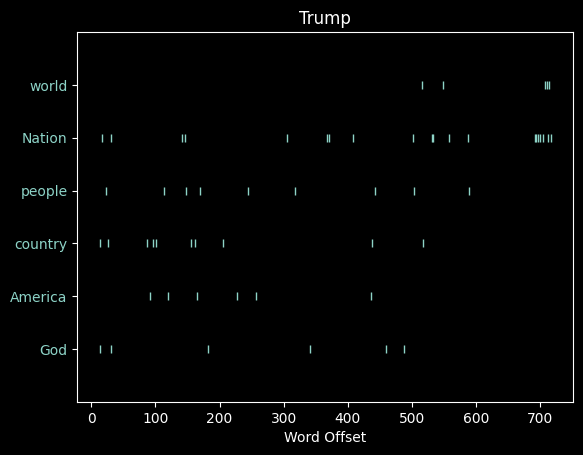

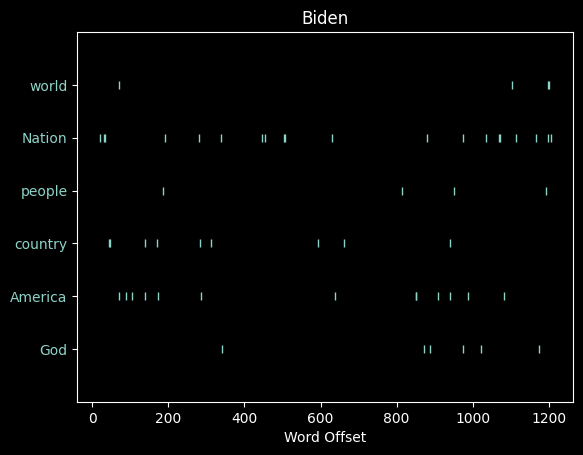

In [87]:
# Dispersion plot for Trump and biden tokens
dispersion_plot(df_trump["trump_token"], list_of_words_to_plot, title="Trump")
dispersion_plot(df_biden["biden_token"], list_of_words_to_plot, title="Biden")